# Notebook de ejercicios sobre tkinter

In [ ]:
from tkinter import *

In [ ]:
raiz = Tk()

raiz.mainloop()

## PCA a pata

In [25]:
# Datos
import  pandas  as pd
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data',  header = None)

In [22]:
# Separar  datos  de  entrenamiento y prueba
from  sklearn.model_selection  import  train_test_split
X,  y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0:].values
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.3)
# estadarizamos
from  sklearn.preprocessing  import  StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform( X_test )

In [23]:
# Matriz  de  covarianza  eigenvalores & eigenvectores
import numpy as np
cov_mat = np.cov(X_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print ('Eigenvalores:  \n ', eigen_vals)

Eigenvalores:  
  [4.60814263 2.62557334 1.5266725  0.97115234 0.80011763 0.66554416
 0.5019097  0.11784366 0.15326641 0.33366841 0.23501789 0.29777936
 0.26900303]


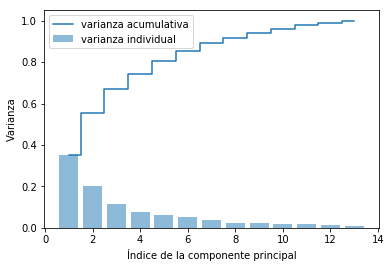

In [24]:
# Gráfica que muestra los aportes de cada eigenvalor
# y la suma acumulativa
import  matplotlib . pyplot  as  plt
tot = sum(eigen_vals)
var_exp = [(ev / tot) for ev in sorted(eigen_vals, reverse = True)]
cum_var_exp = np.cumsum(var_exp)
plt.bar(range (1, 14), var_exp, alpha = 0.5, align = 'center', label = 'varianza individual')
plt.step(range(1, 14), cum_var_exp, where = 'mid', label = 'varianza acumulativa')
plt.xlabel('Índice de la componente principal')
plt.ylabel('Varianza')
plt.legend(loc = 'best')
plt.show ()

In [14]:
# Transformación  de  c a r a c t e r í s t i c a s
# l i s t a  de  tuplas  ( e_val ,  e_vec )
eigen_par = [ ( np.abs(eigen_vals[i]), eigen_vecs [:, i])
             for  i  in  range(len(eigen_vals))]
# ordenar  de mayor a menor e_val
eigen_par.sort(key = lambda k :  k[0],  reverse = True )

In [15]:
# Seleccionar  2  c a r a c t e r í s t i c a s  con  l o s  eigenvalores  más grandes (~60 %) para
# g r a f i c a r l o s ,  en  la  ’ realidad ’  se  debe  an a li z a r  cuánto  desea  mantenerse  del  t o t a l
w = np . hstack (( eigen_par[0][1][:, np.newaxis],
                  eigen_par[1][1][:, np.newaxis]))
# Matriz  de  proyección W de 13 x 2 ,  a  p a r t i r  de  l o s  2  eigenvectores  p r i n c i p a l e s
print('Matriz W :  \n', w)

Matriz W :  
 [[-0.14718926 -0.4845803 ]
 [ 0.24089225 -0.24364068]
 [-0.02019505 -0.29096583]
 [ 0.22260546 -0.01578624]
 [-0.15999719 -0.26133319]
 [-0.39491772 -0.07042219]
 [-0.41917724  0.01048579]
 [ 0.32267917 -0.05907244]
 [-0.3265594  -0.09294028]
 [ 0.06870303 -0.53684282]
 [-0.28145026  0.33410288]
 [-0.36578775  0.15707404]
 [-0.29082406 -0.33304941]]


In [16]:
# Con ayuda de  la  matriz  de  proyección  se  puede  transformar
# una muestra  (1 x13 )  al  subespacio  de PCA (1 x2 )
print ('Original:  ', X_train_std[0])
print ('Proyectado  : ',  X_train_std[0].dot(w))

Original:   [ 0.05836027 -1.35464623 -2.59076011 -1.20943249 -1.0183721  -0.52341633
  0.02654443 -1.01681016 -0.21445933 -0.18651119  0.99527535 -0.19256357
 -1.13167791]
Proyectado  :  [-0.34475087  2.23726148]


In [17]:
# Todo  e l  conjunto  de  entrenamiento  (124 x13 a 124x2 )
X_train_pca = X_train_std.dot(w)

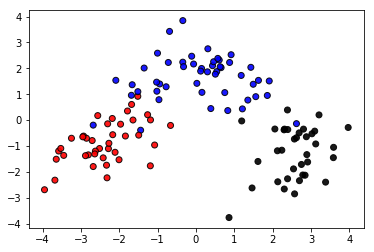

In [20]:
# Visualización  del  conjunto  wine  transformado como un  s c a t t e r  de 124x2
colors = np.array([ 'lime', 'red', 'blue', 'black', 'lightgreen',  'cyan'])
y = y_train[:, 0]
plt.scatter(X_train_pca[:, 0],
            X_train_pca[:, 1],
            alpha = 0.9,
            c = colors[y.astype(int)] ,
            edgecolor = 'black')

## Con scikit - learn

In [10]:
# B i b l i o t e c a s
import numpy as np
import  matplotlib . pyplot  as  plt
import  pandas  as pd
# Datos
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header = None)

In [11]:
# Separar  datos  de  entrenamiento y prueba
from  sklearn.model_selection  import  train_test_split
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0:].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
# estadarizamos
from  sklearn.preprocessing  import  StandardScaler
sc = StandardScaler ()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [12]:
# Probaremos con una  re gr e si ó n  l o g í s t i c a
from  sklearn . linear_model  import  LogisticRegression
from  sklearn . decomposition  import PCA
# i n i c i a l i z a r PCA y  e l  modelo de RL
pca = PCA(n_components = 2)
lr = LogisticRegression(multi_class = 'auto', solver = 'liblinear')
# Ajustar  y  transformar  l o s  datos
X_train_pca = pca.fit_transform( X_train_std )
X_test_pca = pca.transform(X_test_std)
lr.fit(X_train_pca, y_train[:, 0])

ValueError: multi_class should be either multinomial or ovr, got auto

In [ ]:
# Función  para  g r a f i c a r
from  matplotlib.colors  import  ListedColormap
def  plot_decision_regions (X, y, classifier, resolution = 0.02):
    y = y.astype(int)
    colors = np.array(['lime', 'red', 'blue', 'black', 'lightgreen', 'cyan'])
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # S u p e r f i c i e s  de  dec isión
    x1_min, x1_max = X[:, 0].min() - 1, X[:,0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1 , X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                                np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha = 0.4, cmap = cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    # Conjuntos  de cada  c l a s e
    plt.scatter(X[:, 0],
                X[:, 1],
                alpha = 0.9,
                c = colors[y.astype(int)],
                edgecolor = 'black',)

In [ ]:
# Graficar  e l  conjunto  de  entrenamiento 
plot_decision_regions(X_train_pca, y_train[:, 0], classifier = lr)
plt.xlabel('PC 1')
plt.ylabel ('PC 2')
plt.show()

In [ ]:
# Graficar  l o s  resultados  para  e l  conjunto  de  prueba
plot_decision_regions(X_test_pca, y_test[:, 0], classifier = lr)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()